In [1]:
import sys
sys.path.append('./')

from Analyzation_relative import Descriptive_statistics as DS
from Analyzation_relative import Regression as Reg
from Analyzation_relative.Statistical_inference import Normality_test

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools   #* 用于进行解释变量名称的遍历。
import sys
import seaborn as sns
import statsmodels.formula.api as smf
from  statsmodels.api import ProbPlot

from scipy.stats import norm


#*----------------------------------------------------------------
mpl.rcParams['font.sans-serif'] = ['SimHei'] # *允许显示中文
plt.rcParams['axes.unicode_minus']=False# *允许显示坐标轴负数
#*----------------------------------------------------------------

params = {'legend.fontsize': 7,}

plt.rcParams.update(params)

In [2]:
df = pd.read_csv("data/test_data.csv",encoding = "utf-8")
df.head(1)

,rent,bedroom,livingroom,bathroom,area,room,floor_grp,subway,region,heating
0,2730,2,1,1,12,1.0,2.0,1.0,通州,1.0


In [ ]:
fig , axes = plt.subplots(figsize = (8 , 8) , dpi = 150)
fig.patch.set_facecolor("white") #* 设置背景 以免保存的图片背景虚化
DS.Mosaic_plt(df[['bedroom' , 'region']] , ax = axes)
plt.show()

In [3]:
DS.DataLabeling(df)

[0, 2, 1, 1, 2, 1, 2, 1, 2, 1]

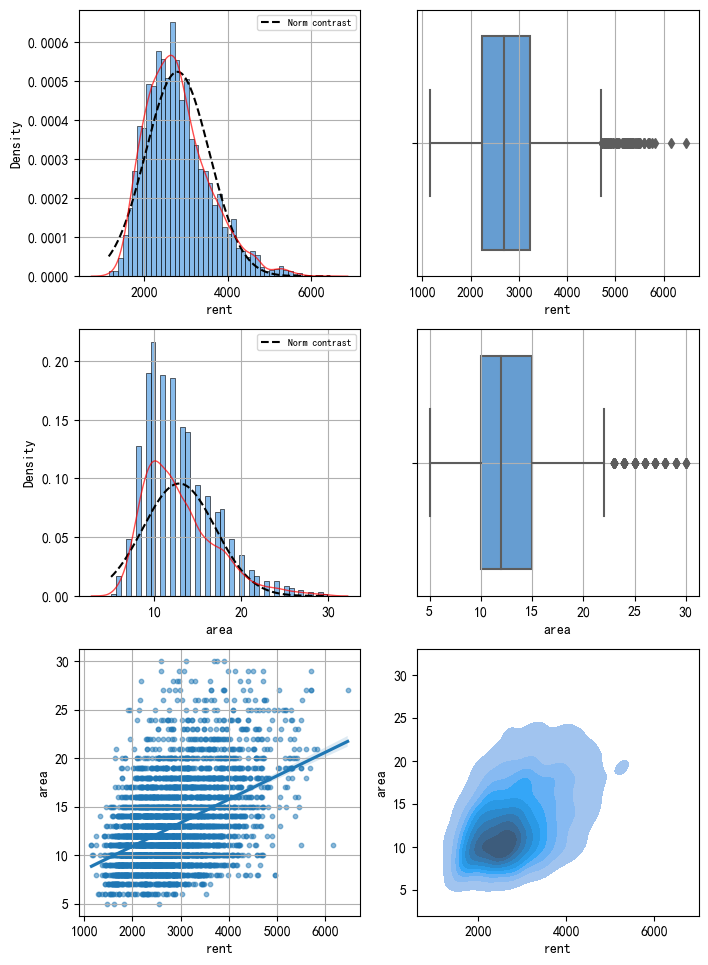

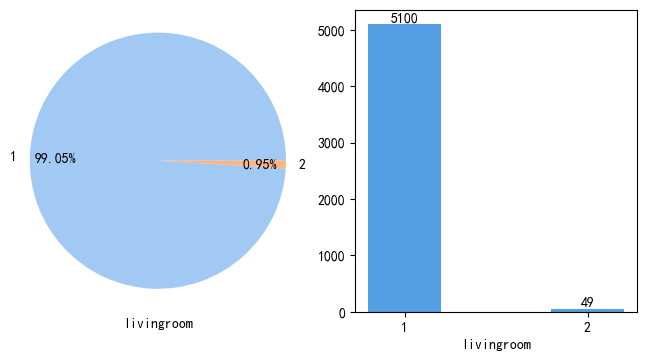

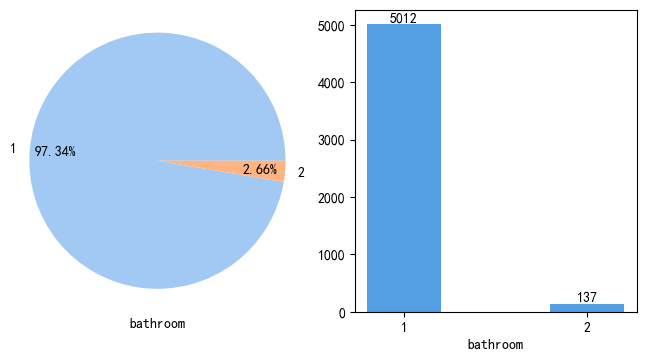

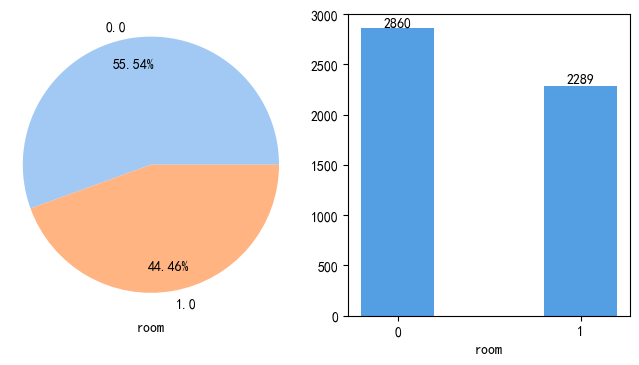

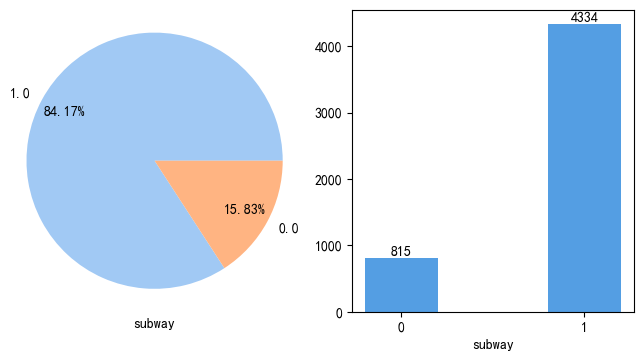

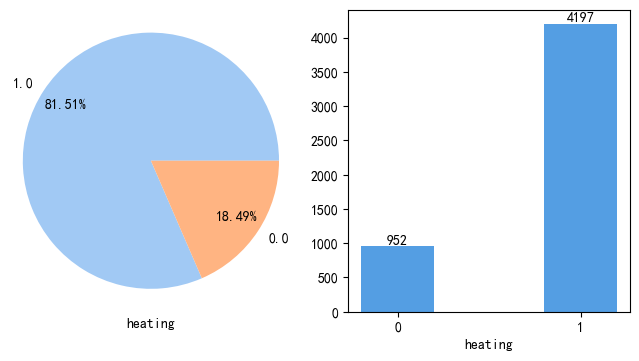

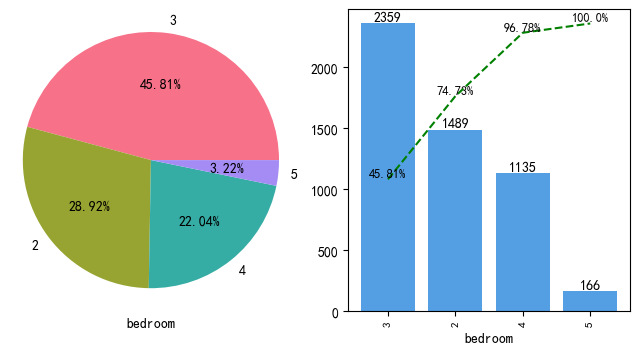

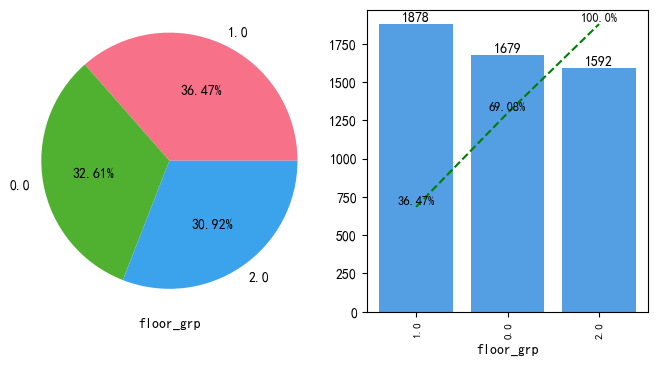

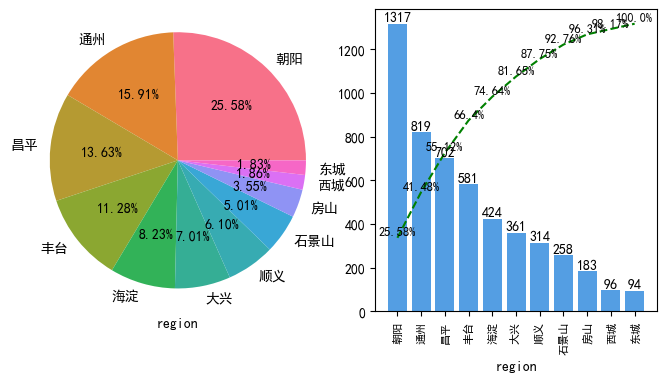

In [3]:
DS.Auto_plt(df , [0, 2, 1, 1, 0, 1, 2, 1, 2, 1])

In [51]:


new_df = df[['livingroom' , 'bathroom' , 'bedroom']]
test = new_df.groupby(['livingroom' , 'bathroom' , 'bedroom'])
b = pd.DataFrame(test.size().reset_index())
b.columns=['livingroom' , 'bathroom' , 'bedroom' , 'val']
b

,livingroom,bathroom,bedroom,val
0,1,1,2,1486
1,1,1,3,2331
2,1,1,4,1068
3,1,1,5,111
4,1,2,2,1
5,1,2,3,23
6,1,2,4,50
7,1,2,5,30
8,2,1,3,1
9,2,1,4,8


In [53]:
ct_abc = pd.pivot_table(b, values= 'val', index=['livingroom' , 'bathroom'], columns='bedroom',
                        aggfunc=np.sum , margins = True).fillna(0)
ct_abc

bedroom                   2       3       4      5   All
livingroom bathroom                                     
1          1         1486.0  2331.0  1068.0  111.0  4996
           2            1.0    23.0    50.0   30.0   104
2          1            0.0     1.0     8.0    7.0    16
           2            2.0     4.0     9.0   18.0    33
All                  1489.0  2359.0  1135.0  166.0  5149